In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [12]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10('/kaggle/input/cifar10-python',
                                 download = True, train = True, transform = transform)

test_dataset = datasets.CIFAR10('/kaggle/input/cifar10-python',
                                download = True, train = False, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
batch_size = 64

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size,
                                          shuffle=True, num_workers = 0)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size,
                                         shuffle = False, num_workers = 0)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class LinearClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.view((x.size(0), -1))
        x = F.softmax(self.fc(x), dim = 1)
        return x

In [15]:
import torch.optim as optim

input_size = 3*32*32
num_classes = 10

model = LinearClassifier(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [16]:
def train_model(model, cirterion, optimizer, trainloader, num_epochs):
    print("-----Training Started------")
    for epoch in range(num_epochs):

        model.train()

        running_loss = 0.0
        
        for images, labels in trainloader:

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(trainloader.dataset)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
        
        torch.save(model, '/kaggle/working/model.pth')
        
    print("-----Training Completed-----")

In [17]:
num_epochs = 16

train_model(model, criterion, optimizer, trainloader, num_epochs)

-----Training Started------
Epoch [1/16], Loss: 0.0343
Epoch [2/16], Loss: 0.0333
Epoch [3/16], Loss: 0.0331
Epoch [4/16], Loss: 0.0329
Epoch [5/16], Loss: 0.0328
Epoch [6/16], Loss: 0.0327
Epoch [7/16], Loss: 0.0326
Epoch [8/16], Loss: 0.0325
Epoch [9/16], Loss: 0.0324
Epoch [10/16], Loss: 0.0324
Epoch [11/16], Loss: 0.0323
Epoch [12/16], Loss: 0.0323
Epoch [13/16], Loss: 0.0322
Epoch [14/16], Loss: 0.0322
Epoch [15/16], Loss: 0.0322
Epoch [16/16], Loss: 0.0321
-----Training Completed-----


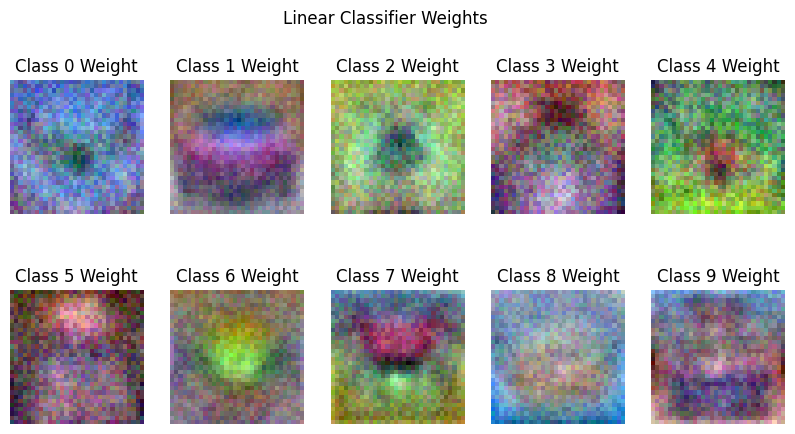

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 모델의 가중치 추출
weights = model.fc.weight.data.numpy()

# 가중치 시각화
plt.figure(figsize=(10, 5))
for i in range(num_classes):
    plt.subplot(2, 5, i+1)
    # 가중치 값을 스케일링하여 [0, 255] 범위로 변환
    scaled_weights = (weights[i] - weights[i].min()) / (weights[i].max() - weights[i].min())
    scaled_weights = (scaled_weights * 255).astype(np.uint8)
    plt.imshow(scaled_weights.reshape(3, 32, 32).transpose(1,2,0))
    
    plt.title(f'Class {i} Weight')
    plt.axis('off')
plt.suptitle('Linear Classifier Weights')
plt.show()

In [19]:
def test_model(model, testloader):
    
    model.eval()
    
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in testloader:

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Accuracy on test set: {accuracy:.4f}")

In [20]:
test_model(model, testloader)

Accuracy on test set: 0.4050
